**DATA BOOTCAMP FINAL PROJECT: Isaac Chocron, Zander (Alexander) Futernick, and Juan Rodriguez**

This project investigates five questions about the commercial air travel market between South Florida and New York City:

South Florida Airports = Miami (MIA) and Ft. Lauderdale (FLL)

New York City Airports = La Guardia (LGA), John F. Kennedy (JFK), and Newark-Liberty (EWR)

1. Which airlines hold the largest market share between South Florida and New York City?  (Pie Chart: SoFL-NYC Airline Market Share by Passengers Moved)
2. When is it cheapest to fly? (Line Graph: Average Fares vs Quarter)
3. Which airlines offer the lowest fares? (Line Graph: Average Fare vs Quarter)
4. Which airport combinations move the most passengers in the market? (Bar Chart: Number of Passengers vs Airport Combinations)
5. Which airport combinations are cheapest? (Bar Chart: Average Fare vs Airport Combinations)

**Airline Route Pairings: [routes in parenthesis include routing in reverse direction as well]**

**American** (AA): (MIA-LGA, MIA-JFK, MIA-EWR, FLL-EWR, FLL-LGA, FLL-JFK) 

**Delta** (DL): (MIA-LGA, MIA-JFK, MIA-EWR, FLL-EWR, FLL-LGA, FLL-JFK)

**United** (UA): (MIA-LGA, MIA-EWR, FLL-EWR, FLL-LGA)

**JetBlue** (B6): (FLL-JFK, FLL-EWR, FLL-LGA)

**Virgin America** (VX): (FLL-JFK) [Past service and future service is rather inconsistent]

**Frontier** (F9): (MIA-LGA)

**Spirit** (NK): (FLL-LGA)

The data for this project is sourced from the Bureau of Transportation Statistics (BTS), a division of the United States Department of Transportation (DOT). This data is called an "Origin and Destination Survey" (a.k.a. O&D) and the BTS describes this data as: 

"The Airline Origin and Destination Survey (DB1B) is a 10% sample of airline tickets from reporting carriers collected by the Office of Airline Information of the Bureau of Transportation Statistics. Data includes origin, destination and other itinerary details of passengers transported. This database is used to determine air traffic patterns, air carrier market shares and passenger flows."

The BTS has been collecting this data quarterly from airlines since 1993. The data is not perfect, but it is the only publicly available data related to air travel markets; airlines prefer to keep this data proprietary, but the DOT requires that airlines publicly report partial information. As such, this data is most reliable for routes between large markets, of which SoFL-NYC is one of the largest. (The larger the market, the more data points an airline must provide.)

O&D data represents **point-to-point** passengers only, meaning that the passenger began in one of the two South Florida airports and ended in of the three New York City airports, or vice versa. (In other words, O&D data would not include a passenger who flew from MIA to JFK, to then catch a connecting flight to Tokyo Narita.)

[Please see attached file for the code that originally sorted through the O&D data for 2015]

# Pie Chart: SoFL-NYC Airline Market Share by Passengers Moved
Which airlines hold the largest market share between South Florida and New York? 

(Includes "total market" flights: SoFL to NYC and NYC to SoFL)

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
global data
data = open("/Users/alexanderfuternick/Documents/FlightData/FULL_NYC_MIA_OData.csv", "r")
data = data.readlines()
cData= [ x[:-1].split(",") for x in data ]
data = [ x[:-1].split(",") for i,x in enumerate(data) if i!=0 ]

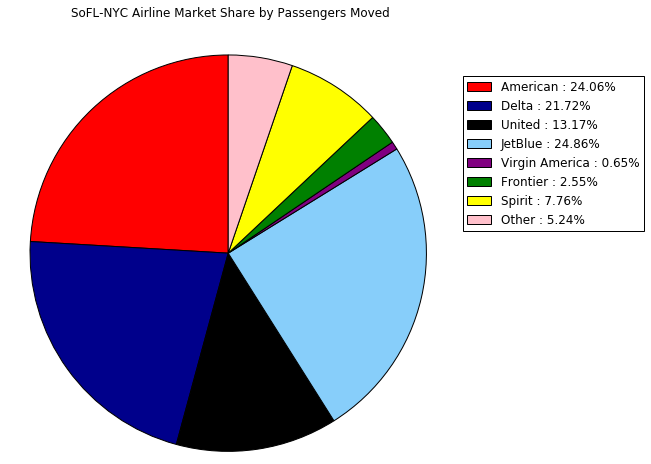

In [7]:
AA = sum([float(x[6]) for x in data if x[5]=="AA"])
DL = sum([float(x[6]) for x in data if x[5]=="DL"])
UA = sum([float(x[6]) for x in data if x[5]=="UA"])
B6 = sum([float(x[6]) for x in data if x[5]=="B6"])
VX = sum([float(x[6]) for x in data if x[5]=="VX"])
F9 = sum([float(x[6]) for x in data if x[5]=="F9"])
NK = sum([float(x[6]) for x in data if x[5]=="NK"])
other = sum([float(x[6]) for x in data if x[5]!="NK" and x[5]!="B6" and x[5]!="UA" and  x[5]!="AA" and  x[5]!="DL" and  x[5]!="VX" and  x[5]!="F9"])
# AA (color red), DL(dark blue), UA(black), B6 (light blue), VX (purple), F9 (green), NK (yellow)
sizes = [AA, DL, UA, B6, VX, F9, NK, other]
x = ['American', 'Delta', 'United', 'JetBlue', 'Virgin America', 'Frontier', 'Spirit', 'Other']
arr =  np.array(sizes)
percent = 100.*arr/arr.sum()
labels = ['{0} : {1:1.2f}%'.format(x,y) for x,y in zip(x, percent)]
colours = ['red','darkblue', 'black', 'lightskyblue', 'purple', 'green', 'yellow', 'pink']
patches, texts = plt.pie(sizes, colors=colours, startangle=90)
fig = plt.gcf()
fig.set_size_inches(6.5, 6.5)
plt.legend(patches, labels,  loc="best", bbox_to_anchor=(1.02, 0.94), borderaxespad=0)
plt.axis('equal')
plt.title('SoFL-NYC Airline Market Share by Passengers Moved\n\n')
plt.tight_layout()
plt.show()

This chart shows us which airlines transport the most passengers between the South Florida and New York City markets. We see that American Airlines (AA) and JetBlue (B6) hold the largest market share. 

Interestingly, JetBlue only serves the Ft. Lauderdale airport, while American Airlines serves both the Miami (MIA) and Ft. Lauderdale airports. As will be seen in the line graph "Average Fare vs. Quarter" below, JetBlue offers lower fares than American, which is due in part to the fact that FLL is a lower cost airport to airlines than MIA.

("Other" refers to the remaining 7 (of 14 total) commercial airlines that serve the SoFL-NYC market. The 7 other airlines combined only move 5.24% of the market.)

# Line Graph: Average Fare vs Quarter: 
When is it cheapest to fly?

Which airlines offer the lowest fares?

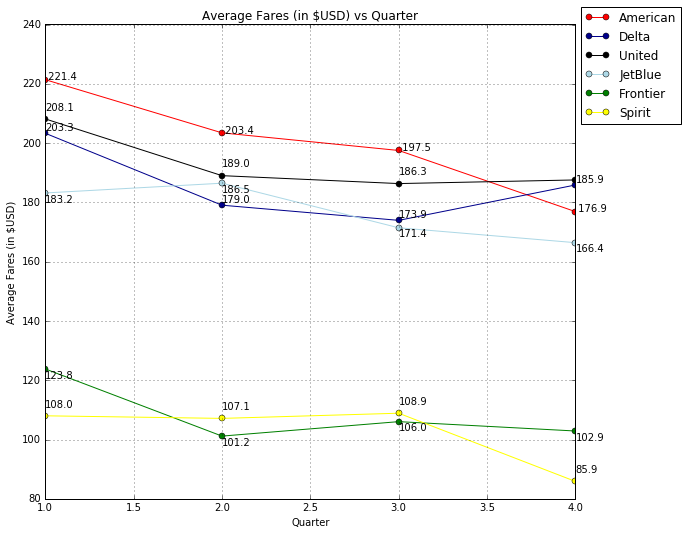

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
global data
data = open("/Users/alexanderfuternick/Documents/FlightData/FULL_NYC_MIA_OData.csv", "r")
data = data.readlines()
data = [ x[:-1].split(",") for i,x in enumerate(data) if i!=0 ]
AAQuarters = []
DLQuarters = []
UAQuarters = []
B6Quarters = []
VXQuarters = []
F9Quarters = []
NKQuarters = []
Quarters = ['1','2','3','4']
for quarter in Quarters:
    totalAAfare = sum([float(x[7])*float(x[6]) for x in data if x[5]=="AA" and x[2]==quarter])
    totalAApassagers = sum([float(x[6]) for x in data if x[5]=="AA" and x[2]==quarter])
    if(totalAApassagers==0 or totalAAfare==0):
        AAavarage = 0
    else:
        AAavarage = totalAAfare / totalAApassagers
    AAQuarters.append(AAavarage)
    # get Dl fares for the quarters and append them to a list
    totalDLfare = sum([float(x[7])*float(x[6]) for x in data if x[5]=="DL" and x[2]==quarter])
    totalDLpassagers = sum([float(x[6]) for x in data if x[5]=="DL" and x[2]==quarter])
    if(totalDLpassagers==0 or totalDLfare==0):
        DLavarage = 0
    else:
        DLavarage = totalDLfare / totalDLpassagers
    DLQuarters.append(DLavarage)
    # get UA fares for the quarters and append them to a list
    totalUAfare = sum([float(x[7])*float(x[6]) for x in data if x[5]=="UA" and x[2]==quarter])
    totalUApassagers = sum([float(x[6]) for x in data if x[5]=="UA" and x[2]==quarter])
    if(totalUApassagers==0 or totalUAfare==0):
        UAavarage = 0
    else:
        UAavarage = totalUAfare / totalUApassagers
    UAQuarters.append(UAavarage)
    # get B6 fares for the quarters and append them to a list
    totalB6fare = sum([float(x[7])*float(x[6]) for x in data if x[5]=="B6" and x[2]==quarter])
    totalB6passagers = sum([float(x[6]) for x in data if x[5]=="B6" and x[2]==quarter])
    if(totalB6passagers==0 or totalB6fare==0):
        B6average = 0
    else:    
        B6average = totalB6fare / totalB6passagers
    B6Quarters.append(B6average)
    # get F9 fares for the quarters and append them to a list
    totalF9fare = sum([float(x[7])*float(x[6]) for x in data if x[5]=="F9" and x[2]==quarter])
    totalF9passagers = sum([float(x[6]) for x in data if x[5]=="F9" and x[2]==quarter])
    if(totalF9passagers==0 or totalF9fare==0):
        F9average = 0
    else:
        F9average = totalF9fare / totalF9passagers
    F9Quarters.append(F9average)
    # get NK fares for the quarters and append them to a list
    totalNKfare = sum([float(x[7])*float(x[6]) for x in data if x[5]=="NK" and x[2]==quarter])
    totalNKpassagers = sum([float(x[6]) for x in data if x[5]=="NK" and x[2]==quarter])
    if(totalNKpassagers==0 or totalNKfare==0):
        NKavarage = 0
    else:
        NKavarage = totalNKfare / totalNKpassagers
    NKQuarters.append(NKavarage)

# Plot the Line graph using the data above
fig, axv = plt.subplots()
fig.set_size_inches(9.5, 8.5)
axv.plot(Quarters, AAQuarters, color='red',marker='o', label = 'American')
for i,j in zip(Quarters,AAQuarters):
    axv.annotate(" "+str("{0:.1f}".format(j)),xy=(i,j))
axv.plot(Quarters, DLQuarters, color='darkblue',marker='o', label = 'Delta')
for i,j in zip(Quarters,DLQuarters):
    axv.annotate(str("{0:.1f}".format(j)),xy=(i,j+1))
axv.plot(Quarters, UAQuarters, color='black',marker='o', label = 'United')
for i,j in zip(Quarters[:-1],UAQuarters[:-1]):
    axv.annotate(str("{0:.1f}".format(j)),xy=(i,j+3))
axv.plot(Quarters, B6Quarters, color='lightblue',marker='o', label = 'JetBlue')
for i,j in zip(Quarters,B6Quarters):
    axv.annotate(str("{0:.1f}".format(j)),xy=(i,j-3))
axv.plot(Quarters, F9Quarters, color='green',marker='o', label = 'Frontier')
for i,j in zip(Quarters,F9Quarters):
    axv.annotate(str("{0:.1f}".format(j)),xy=(i,j-3))
axv.plot(Quarters, NKQuarters, color='yellow',marker='o', label = 'Spirit')
for i,j in zip(Quarters, NKQuarters):
    axv.annotate(str("{0:.1f}".format(j)),xy=(i,j+3))
handles, labels = axv.get_legend_handles_labels()
plt.legend(handles, labels, loc="lower right",bbox_to_anchor=(1.2, 0.79), borderaxespad=0)
plt.ylabel('Average Fares (in $USD)')
plt.title('Average Fares (in $USD) vs Quarter')
plt.xlabel('Quarter')
plt.grid(True)
plt.show()

As expected, the legacy carriers (American, Delta, and United) are more expensive than the ultra low cost carriers (Frontier and Spirit). [JetBlue is not considered a legacy carrier as it was established after Airline Deregulation Act of 1978] 

NOTE: Virgin America is noticeably absent from this graph due to the airline's inconsistent reporting with market fares for quarter 3 of 2015.

# Bar Chart: Number of Passengers vs Airport Combinations: 
Which airport combinations move the most passengers in the market?

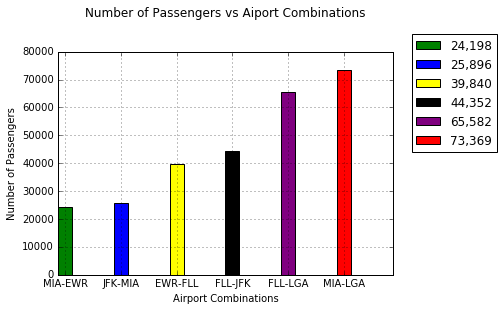

In [9]:
airportCombinations = [['MIA','LGA'], ['JFK','MIA'], ['MIA','EWR'], ['FLL','LGA'], ['FLL','JFK'],['EWR','FLL']]
result=[]
for combi in airportCombinations:
    noOfPassagers=sum([float(x[6]) for x in data if (x[3]==combi[0] and x[4]== combi[1]) or (x[3]==combi[0] and x[4]== combi[1])])
    result.append((combi[0]+" - "+combi[1],noOfPassagers))
import numpy as np
#sort  in ascending order
passengers = sorted([x[1] for x in result])
passengersStr = sorted(["{0:3,.0f}".format(x[1]) for x in result])
sortedLabels = sorted(result, key=lambda x: x[1], reverse=False)
labels = [x[0].replace(" ","") for x in sortedLabels]
groups = 6
colourDict = {'MIA-LGA':'red', 'JFK-MIA':'blue','MIA-EWR':'green','FLL-LGA':'purple','FLL-JFK':'black', 'EWR-FLL':'yellow'}
colours = []
for label in labels:
    colours.append(colourDict[label])    
index = np.arange(groups)
barWidth = 0.25
error_config = {'ecolor': '0.3'}
rects1 = plt.bar(index, passengers, barWidth, color=colours,error_kw=error_config)
plt.xlabel('Airport Combinations')
plt.ylabel('Number of Passengers')
plt.title('Number of Passengers vs Aiport Combinations\n\n')
plt.xticks(index + barWidth/2, labels)
plt.grid(True)
plt.legend((rects1), (passengersStr), loc="lower right",bbox_to_anchor=(1.31, 0.55), borderaxespad=0)
plt.show()




La Guardia is expected to be the most popular airport for O&D travelers because LGA provides the most direct access to New York City. In other words, LGA is intended more for passengers whose **final** destination is New York City, whereas JFK and EWR include an international connecting market.

# Bar Chart: Average Fare vs Airport Combinations: 
Which airport combinations are cheapest?

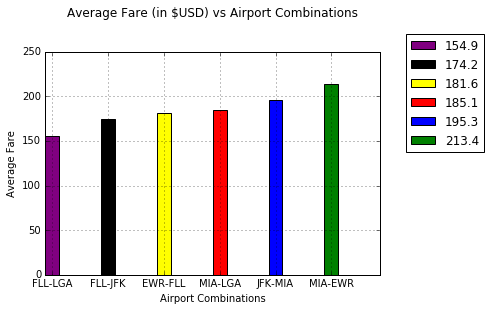

In [10]:
airportCombinations = [['MIA','LGA'], ['JFK','MIA'], ['MIA','EWR'], ['FLL','LGA'],['FLL','JFK'],['EWR','FLL']]
result=[]
for combi in airportCombinations:
    totalFares=sum([float(x[6])*float(x[7]) for x in data if (x[3]==combi[0] and x[4]== combi[1]) or (x[3]==combi[0] and x[4]== combi[1])])
    noOfPassagers=sum([float(x[6]) for x in data if (x[3]==combi[0] and x[4]== combi[1]) or (x[3]==combi[0] and x[4]== combi[1])]) 
    if(totalFares!=0):
        result.append((combi[0]+"-"+combi[1],totalFares/noOfPassagers))
    else:
        result.append((combi[0]+"-"+combi[1],0))
import numpy as np
#sort  in ascending order
averageFares = sorted([x[1] for x in result])
averageFaresStr = sorted(["{0:.1f}".format(x[1]) for x in result])
sortedLabels = sorted(result, key=lambda x: x[1], reverse=False)
labels = [x[0].replace(" ","") for x in sortedLabels]
groups = 6
fig, ax = plt.subplots()
index = np.arange(groups)
barWidth = 0.25
error_config = {'ecolor': '0.3'}
colourDict = {'MIA-LGA':'red', 'JFK-MIA':'blue','MIA-EWR':'green','FLL-LGA':'purple','FLL-JFK':'black', 'EWR-FLL':'yellow'}
colours = []
for label in labels:
    colours.append(colourDict[label])   
rects1 = plt.bar(index, averageFares, barWidth, color=colours,error_kw=error_config,)
plt.xlabel('Airport Combinations')
plt.ylabel('Average Fare')
plt.title('Average Fare (in $USD) vs Airport Combinations\n\n')
plt.xticks(index + barWidth/2, labels)
plt.grid(True)
plt.legend((rects1), (averageFaresStr), loc="lower right",bbox_to_anchor=(1.31, 0.55), borderaxespad=0)
plt.show()


As represented by the typically lower-cost carriers that serve Ft. Lauderdale (FLL), the average fares for flights departing from or arriving to FLL are all cheaper than flying from or to Miami (MIA). 

Interestingly, when compared to the bar chart "Number of Passengers vs Airport Combinations," the highest average fare was for the market that served the fewest passengers, MIA-EWR; and the second most flown route, FLL-LGA, is the cheapest of the possible airport combinations.  